In [1]:
from IPython.display import display, Markdown
from itertools import product, combinations
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats
import statsmodels.api as sm

In [2]:
if os.path.exists('src'):
    pass
else:
    !pip install scikit-posthocs
    
import scikit_posthocs as sp

### Глава 10

#### Непараметрические критерии

** Дисперсионный анализ требует, чтобы исследуемые признаки подчинялись нормальному распределению, а сравниваемые совокупности имели одинаковые дисперсии (различными могут быть только средние). 

##### СРАВНЕНИЕ ДВУХ ВЫБОРОК: T КРИТЕРИЙ МАННА—УИТНИ

Порядок его вычисления таков.

* Данные обеих групп объединяют и упорядочивают по возрастанию. Ранг 1 присваивают наименьшему из всех значений, ранг 2 — следующему и так далее. Наибольший ранг присваивают самому большому среди значений в обеих группах. Если значения совпадают, им присваивают один и тот же средний ранг (например, если два значения поделили 3-е и 4-е места, обоим присваивают ранг 3,5).

* Для меньшей группы вычисляют Т — сумму рангов ее членов. Если численность групп одинакова, Т можно вычислить для любой из них.

* Полученное значение T сравнивают с критическими значениями. Если Т меньше или равно первому из них либо больше или равно второму, то нулевая гипотеза отвергается (различия статистически значимы).

**U-критерий Манна—Уитни** вместо Т вычисляют U, при этом $U = T - n_м(n_м + 1)/2$, где $n_м$ - численность меньшей из групп. 

При численности групп, большей 8, распределение Т приближается к нормальному со средним $\mu_T=\cfrac{n_м(n_м+n_б+1)}{2}$ и стандартным отклонением $\sigma_T=\sqrt{\cfrac{n_мn_б(n_м+n_б+1)}{12}}$, однако если некоторые значения совпадают, стандартное отклонение должно быть уменьшено согласно формуле: $\sigma_T=\sqrt{\cfrac{n_мn_б(N+1)}{12} - \cfrac{n_мn_б}{12N(N^2-1)}\sum{(\tau_i-1)\tau_i(\tau_i+1)}}$, где $N = n_м+n_б$ — общее число членов обеих выборок, $\tau_i$ — число значений i-го ранга, а суммирование производится по всем совпадающим рангам.

Тогда $Z_T=\cfrac{T-\mu_T}{\sigma_T}$ имеет стандартное нормальное распределение. Это позволяет сравнить $Z_T$ с критическими значениями нормального распределения. Более точный результат обеспечивает поправка Йейтса: $Z_T=\cfrac{|T-\mu_T|-1/2}{\sigma_T}$.

##### СРАВНЕНИЕ НАБЛЮДЕНИЙ ДО И ПОСЛЕ ЛЕЧЕНИЯ: КРИТЕРИЙ УИЛКОКСОНА W

Ранговый аналог парного критерия Стьюдента для сравнения "до" и "после" при отсутствии уверенности в нормальности распределения изменения. 

* Вычислите величиныизменений наблюдаемого признака. Отбросьте пары наблюдений, которым соответствует нулевое изменение.

* Упорядочите изменения по возрастанию их абсолютной величины и присвойте соответствующие ранги. Рангами одинаковых величин назначьте средние тех мест, которые они делят в упорядоченном ряду.

* Присвойте каждому рангу знак в соответствии с направлением изменения: если значение увеличилось — «+», если уменьшилось — «–».

* Вычислите сумму знаковых рангов W.

* Сравните полученную величину W с критическим значением. Если она больше критического значения, изменение показателя статистически значимо.

> !!! Существует вариант критерия Уилкоксона, в котором суммируют только положительные или только отрицательные знаковые ранги. На выводе это никак не сказывается, однако значение W, естественно, получается другим. Поэтому важно знать, на какой вариант критерия рассчитана имеющаяся в вашем распоряжении таблица критических значений.

Если число пар измерений больше 20, то распределение W достаточно близко к нормальному со средним $\mu_W=0$ и стандартным отклонением $\sigma=\sqrt{\cfrac{n(n+1)(2n+1)}{6}}$ где n - число пар наблюдений (то есть численность группы).

Если некоторые значения совпадают, стандартное отклонение должно быть уменьшено в соответствии со следующей формулой: $\sigma_W=\sqrt{\cfrac{n(n+1)(2n+1)}{6}-\sum{\cfrac{(\tau_i-1)\tau_i(\tau_i+1)}{12}}}$, где n — численность группы, $\tau_i$ - число значений i-го ранга, а суммирование производится по всем совпадающим рангам.

Можно, таким образом, использовать (с правкой Йейтса на непрерывность): $Z_W = \cfrac{|W| - \cfrac{1}{2}}{\sigma_W}$

##### СРАВНЕНИЕ НЕСКОЛЬКИХ ГРУПП: КРИТЕРИЙ КРУСКАЛА-УОЛЛИСА

Непараметрический аналог однофакторного дисперсионного анализа, нетребующим предположения о нормальности распределения. 

Чтобы выяснить, одинаково ли действие нескольких методов, каждый из которых испытывается на отдельной группе, нужно проделать следующее.

* Объединив все наблюдения, упорядочить их по возрастанию. Совпадающим значениям ранги присваиваются как среднее тех мест, которые делят между собой эти значения. 
* Вычислить критерий Крускала—Уоллиса $Н = \cfrac{D}{N(N+1)/12} = \cfrac{12}{N(N+1)}\sum{n_i(\overline{R_i}-\overline{R})^2}$. $n_i$ - численность i-й группы, $\overline{R_i} = \cfrac{R_i}{n_i}$ - средний ранг для i-й группы, $\overline{R} = \cfrac{N+1}{2}$ - средний ранг для объединенной группы. 
* При большом числе совпадающих рангов значение H следует поделить на $1 - \cfrac{\sum{(\tau_i-1)\tau_i(\tau_i+1)}}{N(N^2-1)}$, где N — число членов всех групп, $\tau_i$ — как обычно, число рангов в i-й связке, а суммирование производится по всем связкам.
* Сравнить вычисленное значение Н с критическим значением $\chi^2$ для числа степеней свободы, на единицу меньшего числа групп. Если вычисленное значение Н окажется больше критического, различия групп статистически значимы.

!!! В случае трех групп приближение с помощью $\chi^2$ пригодно, если численность каждой группы не меньше 5. Для четырех групп — если общее число наблюдений не менее 10. Но если группы совсем малы, не остается ничего, кроме как обратиться к таблице точных значений распределения Крускала—Уоллиса.

##### Непараметрическое множественное сравнение

Когда объемы выборок равны, для множественного сравнения используют непараметрические варианты критериев Ньюмена—Кейлса и Даннета. Когда же объемы выборок различны, применяется критерий Данна.

Критерии Ньюмена—Кейлса и Даннета совпадают практически полностью, поскольку критерий Даннета есть просто вариант критерия Ньюмена—Кейлса для сравнения всех выборок с одной контрольной.

Формула для непараметрического варианта критерия Ньюмена—Кейлса: $q = \cfrac{R_A-R_B}{\sqrt{\cfrac{n^2l(nl+1)}{12}}}$, где $R_A$ $R_B$ — суммы рангов двух сравниваемых выборок, n — объем каждой выборки, l — интервал сравнения. Вычисленное q сравнивается с критическим значением для бесконечного числа степеней свободы.

Значение непараметрического критерия Даннета определяется формулой: $q' = \cfrac{R_кон-R_A}{\sqrt{\cfrac{nl(l+1)}{6}}}$ (l - число всех выборок, включая контрольную!). Значение q′ сравнивается с критическим значением для бесконечного числа степеней свободы.

Критерий Данна (для сравнения выборок разного объема): $Q = \cfrac{\overline{R_A}-\overline{R_B}}{\sqrt{\cfrac{N(N+1)}{12}(\cfrac{1}{n_A}+\cfrac{1}{n_B})}}$, где $\overline{R_A}$ и $\overline{R_B}$ — средние ранги двух сравниваемых выборок, $n_A$ и $n_B$ — их объемы, а N — общий объем всех сравниваемых выборок.

Критерием Данна можно воспользоваться и для сравнения с контрольной выборкой. Приэтом формула для Q остается прежней, только критические значения находятся из другой таблицы.

##### ПОВТОРНЫЕ ИЗМЕРЕНИЯ: КРИТЕРИЙ ФРИДМАНА

Порядок расчета критерия Фридмана.

* Расположите значения для каждого "больного" по возрастанию, каждому значению присвойте ранг.
* Для каждого из методов лечения подсчитайте сумму присвоенных ему рангов.
* Вычислите значение $\chi^2_r = \cfrac{12}{nk(k+1)}S = \cfrac{12}{nk(k+1)\sum{(R_м - \cfrac{n(k+1)}{2})^2}}$, где S - сумма квадратов отклонений истинных сумм рангов, полученных каждым из методов, от средней суммы. $R_м$— истинные суммы рангов для методов лечения, k - число методов лечения (моментов наблюдения), l - число больных.
* Если k=3 и n<10 или k=4 и n<5 критическое значение $\chi^2_r$ берется из таблицы. Если число методов лечения и число больных достаточно велико, воспользуйтесь критическим значением $\chi^2$ с числом степеней свободы ν = k – 1.
* Если рассчитанное значение $\chi^2_r$ превышает критическое — различия статистически значимы.

##### Множественное сравнение после применения критерия Фридмана

Поскольку число больных, подвергшихся каждому методу лечения, одинаково, для этой цели легко приспособить критерий Ньюмена—Кейлса: $q = \cfrac{R_A-R_B}{\sqrt{\cfrac{nl(l+1)}{12}}}$ $R_A$ и $R_B$ — суммы рангов для двух сравниваемых методов лечения, l — интервал сравнения, а п — число больных. Найденное значение q сравнивается с критическим для бесконечного числа степеней свободы. Если найденное значение больше критического, различие методов лечения (моментов наблюдения) статистически значимо.

Если считать один из методов лечения «контролем» (обычно первое измерение, т.е. начальное), то остальные можно сравнить с ним при помощи критерия Даннета: $q' = \cfrac{R_{кон}-R_A}{\sqrt{\cfrac{nl(l+1)}{6}}}$ где l — число всех групп, включая контрольную, $R_кон$ — сумма рангов в контрольной группе. Остальные величины определяются, как в формуле для q. Значение q′ сравнивается с критическим для бесконечного числа степеней свободы.

### ЗАДАЧИ

**10.1**

Анализы, инструментальные исследования и лекарственные средства назначает врач, а платит за них главным образом больной. Многие врачи весьма смутно представляют себестоимость своих назначений и не озабочены тем, чтобы уменьшить расходы больного. Чтобы побудить врачей задуматься об этом, все шире практикуется учет затрат на обследование и лечение. Есть ли основания считать, что это сделает врача более экономным? Интересное исследование провели С. Шредер и соавт. (S. Schroeder et al. Use of laboratory tests and pharmaceuticals: variation among physicians and effect of cost audit on subsequent use. JAMA, 225:969—973, 1973). В течение трех месяцев они регистрировали расходы на обследование и лечение амбулаторных больных, которых наблюдали врачи из клиники Вашингтонского университета. Данные собирали по больным со сходными заболеваниями. Рассчитав для каждого врача среднегодовые расходы на обследование и лечение одного больного, составили общий список, который раздали врачам. Каждый врач знал свой номер в списке, но не знал номеров своих коллег таким образом он мог сравнить свои расходы с расходами других, но не знал, кого именно. Через некоторое время исследователи проверили, какие изменения произошли в расходовании средств у тех же врачей. Результаты представлены в таблице:

**Обследование** - Среднегодовые расходы на обследование одного больного, долл. 

**Лечение** - Среднегодовые расходы на лечение одного больного, долл. 

Врач|Обследование ДО|Обследование ПОСЛЕ|Лечение ДО|Лечение ПОСЛЕ
-|-|-|-|-
1|20|20|32|42
2|17|26|41|90
3|14|1|51|71
4|42|24|29|47
5|50|1|76|56
6|62|47|47|43
7|8|15|60|137
8|49|7|58|63
9|81|65|40|28
10|54|9|64|60
11|48|21|73|87
12|55|36|66|69
13|56|30|73|50

Произошли ли изменения в расходах на обследование и лечение? Есть ли связь между расходами на обследование и лечение? Как можно объяснить полученные результаты?

In [3]:
df = pd.DataFrame(data=[[20, 20, 32, 42], [17, 26, 41, 90], [14, 1, 51, 71], [42, 24, 29, 47], [50, 1, 76, 56], 
                        [62, 47, 47, 43], [8, 15, 60, 137], [49, 7, 58, 63], [81, 65, 40, 28], [54, 9, 64, 60], 
                        [48, 21, 73, 87], [55, 36, 66, 69], [56, 30, 73, 50]],
                  columns=pd.MultiIndex.from_tuples(product(["Среднегодовые расходы на обследование одного больного, долл.", 
                                                             "Среднегодовые расходы на лечение одного больного, долл."],
                                                            ["До ознакомления с расходами", "После ознакомления с расходами"])))

display(df)

Среднегодовые расходы на обследование одного больного, долл.  \
                                    До ознакомления с расходами   
0                                                  20             
1                                                  17             
2                                                  14             
3                                                  42             
4                                                  50             
5                                                  62             
6                                                   8             
7                                                  49             
8                                                  81             
9                                                  54             
10                                                 48             
11                                                 55             
12                                                 56             

                                   \
   После ознакомления с расходами   
0                              20   
1                              26   
2                               1   
3                              24   
4                               1   
5                              47   
6                              15   
7                               7   
8                              65   
9                               9   
10                             21   
11                             36   
12                             30   

   Среднегодовые расходы на лечение одного больного, долл.  \
                               До ознакомления с расходами   
0                                                  32        
1                                                  41        
2                                                  51        
3                                                  29        
4                                                  76        
5                                                  47        
6                                                  60        
7                                                  58        
8                                                  40        
9                                                  64        
10                                                 73        
11                                                 66        
12                                                 73        

                                   
   После ознакомления с расходами  
0                              42  
1                              90  
2                              71  
3                              47  
4                              56  
5                              43  
6                             137  
7                              63  
8                              28  
9                              60  
10                             87  
11                             69  
12                             50

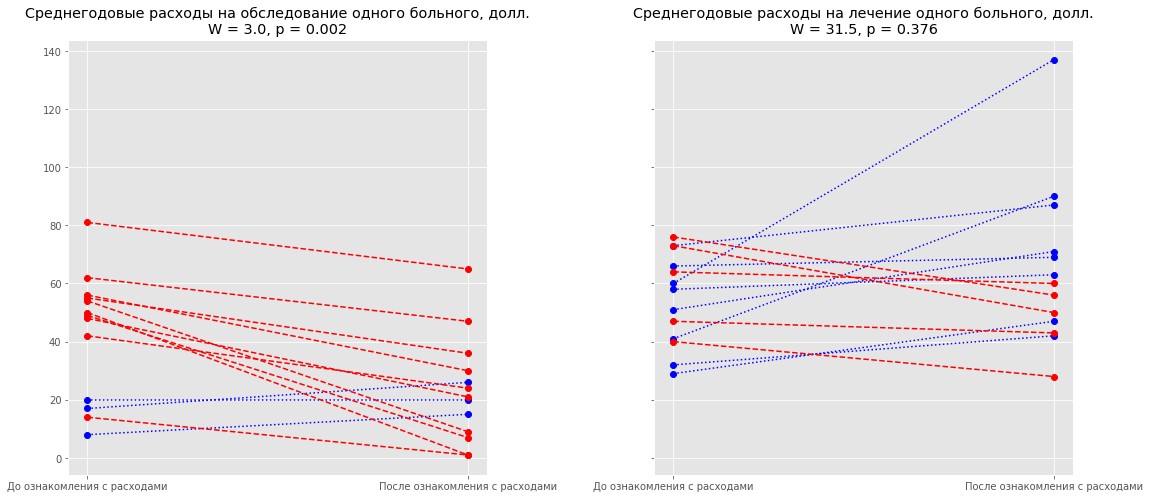

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
plt.subplots_adjust(wspace=0.4)

for i, c in enumerate(df.columns.get_level_values(0).unique()):
    W, p = scipy.stats.wilcoxon((df[(c, "После ознакомления с расходами")] - df[(c, "До ознакомления с расходами")]).pipe(lambda x: x[x!=0]), correction=True)
    axs[i].set_title(f"{c}\nW = {W}, p = {p:.3f}")

    axs[i].plot(df[c].query("`После ознакомления с расходами` >= `До ознакомления с расходами`").T, ":bo");
    axs[i].plot(df[c].query("`После ознакомления с расходами` < `До ознакомления с расходами`").T, "--ro");

Расходы на обследование снизились, на лечение остались прежними.

In [5]:
df_ = df.swaplevel(0, 1, 1).sort_index(axis=1, ascending=[True, False])

for i, c in enumerate(df_.columns.get_level_values(0).unique()):
    rs, p = scipy.stats.spearmanr(df_[c])
    print(f"{c}:\n\trs={rs}, p={p}")

До ознакомления с расходами:
	rs=0.20082549947646627, p=0.5106140548453252
После ознакомления с расходами:
	rs=-0.37964272503770335, p=0.20073526018875068


В обоих случаях, статистически значимой связи между расходами на обследование и лечение нет.

**10.2**

При заболеваниях сетчатки повышается проницаемость ее сосудов. Дж. Фишмен и соавт. (G. Fishman et al. Blood-retinal barrier function in patients with cone or cone-rod dystrophy. Arch. Ophthalmol., 104:545—548, 1986) измерили проницаемость сосудов сетчатки у здоровых и у больных с ее поражением. Полученные результаты приведены в таблице.

Проницаемость сосудов сетчатки:

Здоровые|Больные
-|-
0.5|1.2
0.7|1.4
0.7|1.6
1.0|1.7
1.0|1.7
1.2|1.8
1.4|2.2
1.4|2.3
1.6|2.4
1.6|6.4
1.7|19.0
2.2|23.6

С помощью непараметрического метода проверьте, подтверждают ли эти данные гипотезу о различии в проницаемости сосудов сетчатки? После этого воспользуйтесь соответствующим параметрическим методом. Если выводы окажутся иными, объясните, в чем причина различия.

In [6]:
df = pd.DataFrame(data=[[0.5, 1.2], [0.7, 1.4], [0.7, 1.6], [1.0, 1.7], [1.0, 1.7], 
                        [1.2, 1.8], [1.4, 2.2], [1.4, 2.3], [1.6, 2.4], [1.6, 6.4], 
                        [1.7, 19.0], [2.2, 23.6]],
                  columns=["Здоровые", "Больные"])

display(df)

,Здоровые,Больные
0,0.5,1.2
1,0.7,1.4
2,0.7,1.6
3,1.0,1.7
4,1.0,1.7
5,1.2,1.8
6,1.4,2.2
7,1.4,2.3
8,1.6,2.4
9,1.6,6.4


**Попробуем критерий Стьюдента:**

In [7]:
scipy.stats.ttest_ind(df["Здоровые"], df["Больные"])

Ttest_indResult(statistic=-1.9079041515993858, pvalue=0.06954032984519397)

Согласно критерию Стьюдента, статистически значимых различий нет. Однако он требует нормальности распределения, что не соответствует действительности для группы больных.

### Здоровые

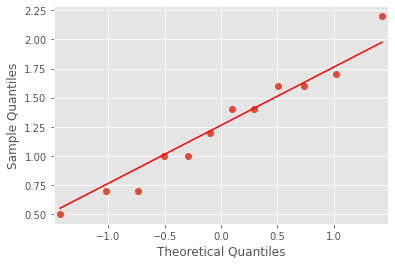

Shapiro-Wilk: ShapiroResult(statistic=0.9667887091636658, pvalue=0.8744300603866577)
Kolmogorov-Smirnov test: (0.1191797683540955, 0.9081292361523237)


___

### Больные

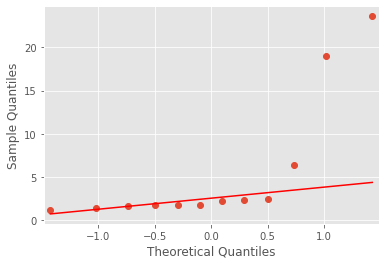

Shapiro-Wilk: ShapiroResult(statistic=0.5944609642028809, pvalue=9.64790815487504e-05)
Kolmogorov-Smirnov test: (0.40560824355765557, 0.0009999999999998899)


___

In [8]:
for c in df.columns:
    display(Markdown(f'### {c}'))
    sm.qqplot(df[c], line='q');
    plt.show()
    print(f"Shapiro-Wilk: {scipy.stats.shapiro(df[c])}")
    print(f"Kolmogorov-Smirnov test: {sm.stats.lilliefors(df[c])}")
    display(Markdown("___"))

Как видно, проницаемость сосудов у больных не подчиняется нормальному распределению, из-за чего использование критерия Стьюдента не корректно, необходимо воспользоваться непараметрическим критерием Манна-Уитни.

In [9]:
U, p = scipy.stats.mannwhitneyu(df["Здоровые"], df["Больные"], alternative='two-sided')

print(f"Результат применения критерия Манна-Уитни: U={U}, p={p:.3f}")

Результат применения критерия Манна-Уитни: U=19.0, p=0.002


Согласно критерию Мана-Уитни, различия статистически значимы.

Поскольку распределение далеко от нормального, пoэтому параметрический критерий проигрывает в чувствительности непараметрическому!

**10.3.**
Данные задачи 10.2 — часть более широкого исследования проницаемости сетчатки. Сравните данные, относящиеся к разным видам поражений.

Проницаемость сосудов сетчатки:

Нормальная сетчатка|Поражение только в области центральной ямки|Аномалии в области центральной ямки и на перефирии
-|-|-
0.5|1.2|6.2
0.7|1.4|12.6
0.7|1.6|12.8
1.0|1.7|13.2
1.0|1.7|14.1
1.2|1.8|15.0
1.4|2.2|20.3
1.4|2.3|22.7
1.6|2.4|27.7
1.6|6.4|
1.7|19.0|
2.2|23.6|

In [10]:
df = pd.DataFrame(data=[[0.5, 1.2, 6.2], [0.7, 1.4, 12.6], [0.7, 1.6, 12.8], [1.0, 1.7, 13.2], [1.0, 1.7, 14.1], 
                        [1.2, 1.8, 15.0], [1.4, 2.2, 20.3], [1.4, 2.3, 22.7], [1.6, 2.4, 27.7], [1.6, 6.4, ], 
                        [1.7, 19.0, ], [2.2, 23.6, ]],
                  columns=["Нормальная сетчатка", "Поражение только в области центральной ямки", "Аномалии в области центральной ямки и на перефирии"])

display(df)

,Нормальная сетчатка,Поражение только в области центральной ямки,Аномалии в области центральной ямки и на перефирии
0,0.5,1.2,6.2
1,0.7,1.4,12.6
2,0.7,1.6,12.8
3,1.0,1.7,13.2
4,1.0,1.7,14.1
5,1.2,1.8,15.0
6,1.4,2.2,20.3
7,1.4,2.3,22.7
8,1.6,2.4,27.7
9,1.6,6.4,NaN


Критерий Крускала-Уоллиса

In [11]:
H, p = scipy.stats.kruskal(*[df[c].dropna() for c in df.columns])

print(f"H={H:.3f}, p={p:.3f}")

H=20.712, p=0.000


Различия статистически значимы.

**10.4.**

Решите задачи 9.5 и 9.6, используя непараметрические методы.

> **9.5**
>При ишемической болезни сердца курение может вызвать приступ стенокардии. Это связано с тем, что никотин увеличивает потребность миокарда в кислороде, а окись углерода связывается с гемоглобином, тем самым снижая поступление кислорода. Однако не способствуют ли развитию приступов и другие компоненты табачного дыма? Чтобы выяснить это, У. Аронов (W. Aronow. Effect of non-nicotine cigarettes and carbon monoxide on angina. Circulation, 61:262—265, 1979) определил у 12 больных ишемической болезнью сердца продолжительность физической нагрузки до развития приступа стенокардии. У каждого больного опыт проводили до и после выкуривания пяти безникотиновых сигарет, а затем до и после вдыхания эквивалентного количества окиси углерода. Были получены следующие результаты.

>Длительность нагрузки до развития приступа стенокардии, секунды:

Больной|До курения безникотиновых сигарет|После курения безникотиновых сигарет|До вдыхания окиси углерода|После вдыхания окисиуглерода
-|-|-|-|-
1|289|155|281|177
2|203|117|186|125
3|359|187|372|238
4|243|134|254|165
5|232|135|219|153
6|210|119|225|148
7|251|145|264|180
8|246|121|237|144
9|224|136|212|152
10|239|124|250|147
11|220|118|209|138
12|211|107|226|141

>Какие выводы позволяют сделать эти данные?

In [12]:
df = pd.DataFrame(data=[[289, 155, 281, 177], [203, 117, 186, 125], [359, 187, 372, 238], [243, 134, 254, 165], [232, 135, 219, 153], 
                        [210, 119, 225, 148], [251, 145, 264, 180], [246, 121, 237, 144], [224, 136, 212, 152], [239, 124, 250, 147], 
                        [220, 118, 209, 138], [211, 107, 226, 141]],
                  columns=  #["До курения безникотиновых сигарет", "После курения безникотиновых сигарет", "До вдыхания окиси углерода", "После вдыхания окисиуглерода"]
                  pd.MultiIndex.from_tuples(product(["Курение безникотиновых сигарет", "Вдыхание окисиуглерода"], ["До", "После"])))


display(df)

Курение безникотиновых сигарет       Вдыхание окисиуглерода      
                               До После                     До После
0                             289   155                    281   177
1                             203   117                    186   125
2                             359   187                    372   238
3                             243   134                    254   165
4                             232   135                    219   153
5                             210   119                    225   148
6                             251   145                    264   180
7                             246   121                    237   144
8                             224   136                    212   152
9                             239   124                    250   147
10                            220   118                    209   138
11                            211   107                    226   141

Проверка на нормальность:

### ('Курение безникотиновых сигарет', 'До')

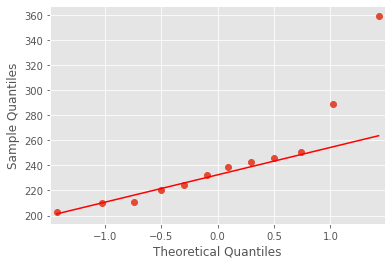

Shapiro-Wilk: ShapiroResult(statistic=0.7935280799865723, pvalue=0.007916140370070934)


___

### ('Курение безникотиновых сигарет', 'После')

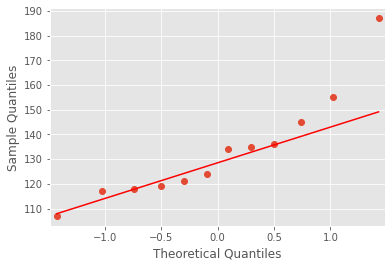

Shapiro-Wilk: ShapiroResult(statistic=0.8757364749908447, pvalue=0.07730762660503387)


___

### ('Вдыхание окисиуглерода', 'До')

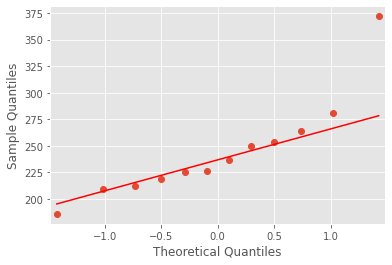

Shapiro-Wilk: ShapiroResult(statistic=0.845920205116272, pvalue=0.032703839242458344)


___

### ('Вдыхание окисиуглерода', 'После')

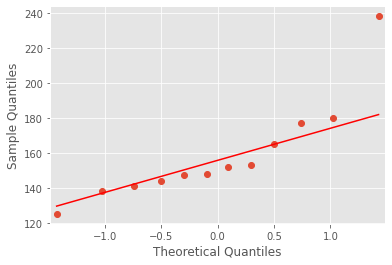

Shapiro-Wilk: ShapiroResult(statistic=0.8171547651290894, pvalue=0.01477853488177061)


___

In [13]:
for c in df.columns:
    display(Markdown(f'### {c}'))
    sm.qqplot(df[c], line='q');
    plt.show()
    print(f"Shapiro-Wilk: {scipy.stats.shapiro(df[c])}")
    display(Markdown("___"))

Как видно и вправду, по хорошему, все распределения не "нормальные" (1 и 3 пациенты значительно выделяются), поэтому при сравнении корректно было бы использовать непараметрические критерии.

Критерий уилкоксона показывает статистическое отличие парных наблюдений до и после (имхо это избыточно, поскольку все изменения одного знака)

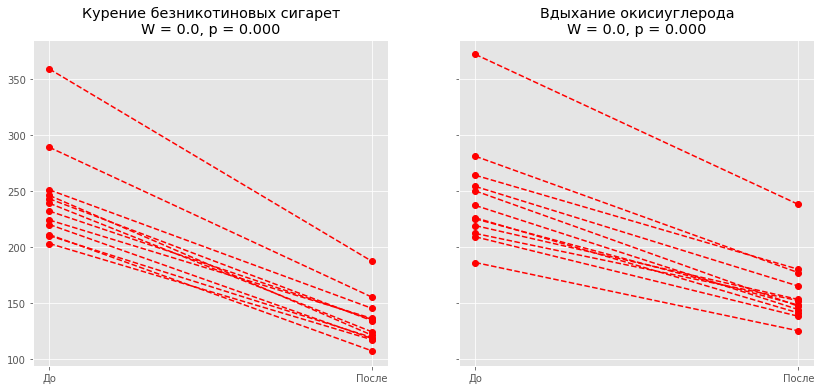

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, c in enumerate(["Курение безникотиновых сигарет", "Вдыхание окисиуглерода"]):
    W, p = scipy.stats.wilcoxon((df[(c, "После")] - df[(c, "До")]).pipe(lambda x: x[x!=0]), correction=True)
    axs[i].set_title(f"{c}\nW = {W}, p = {p:.3f}")

    axs[i].plot(df[c].query("До <= После")[["До", "После"]].T, ":bo");
    axs[i].plot(df[c].query("До > После")[["До", "После"]].T, "--ro");

Применим критерий Фридмана (поскольку у нас повторные измерения)

In [15]:
chi2r, p = scipy.stats.friedmanchisquare(*[df[c].dropna() for c in df.columns])

print(f"chi2r={chi2r:.3f}, p={p:.3f}")

chi2r=32.400, p=0.000


Различия статистически значимы.

Попробуем определить различия между группами, для этого необходимо применить критерий Фридмана с повторными измерениями.

In [16]:
df_ = df.copy()
df_.columns = ["_".join(col) for col in df_.columns]

In [17]:
pcf = sp.posthoc_conover_friedman(df_.reset_index().melt(id_vars="index"), y_col='value', block_col="index", group_col="variable", melted=True)
pcf

,Курение безникотиновых сигарет_До,Курение безникотиновых сигарет_После,Вдыхание окисиуглерода_До,Вдыхание окисиуглерода_После
Курение безникотиновых сигарет_До,1.000000,0.000046,1.000000,0.008179
Курение безникотиновых сигарет_После,0.000046,1.000000,0.000046,0.069501
Вдыхание окисиуглерода_До,1.000000,0.000046,1.000000,0.008179
Вдыхание окисиуглерода_После,0.008179,0.069501,0.008179,1.000000


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x19c978cc700>)

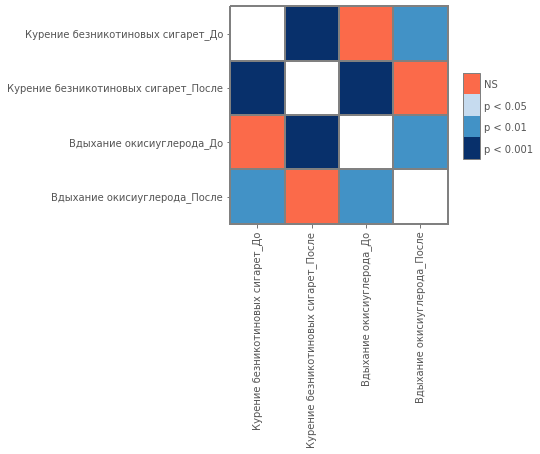

In [18]:
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pcf, **heatmap_args)

Попарные сравнения показывают, что результаты до курения и вдыхания окиси углерода, а так же после курения безникотиновых сигарет и после вдыхания оксиуглерода, статистически значимо не отличаются друг от друга.

Остальные пары, статистически значимо отличаются друг от друга.

> **9.6**
> Определяя эффективность гидралазина, Л. Рубин и Р. Питер измеряли не только легочное сосудистое сопротивление, но и сердечный выброс. Результаты приведены в таблице.

Больной|Измерение 1|Измерение 2|Измерение 3
-|-|-|-
1|3.5|8.6|5.1
2|3.3|5.4|8.6
3|4.9|8.8|6.7
4|3.6|5.6|5.0

> Менялся ли сердечный выброс?

In [19]:
df = pd.DataFrame(data=[[3.5, 8.6, 5.1], [3.3, 5.4, 8.6], [4.9, 8.8, 6.7], [3.6, 5.6, 5.0]],
                  columns=["Измерение 1", "Измерение 2", "Измерение 3"])

display(df)

,Измерение 1,Измерение 2,Измерение 3
0,3.5,8.6,5.1
1,3.3,5.4,8.6
2,4.9,8.8,6.7
3,3.6,5.6,5.0


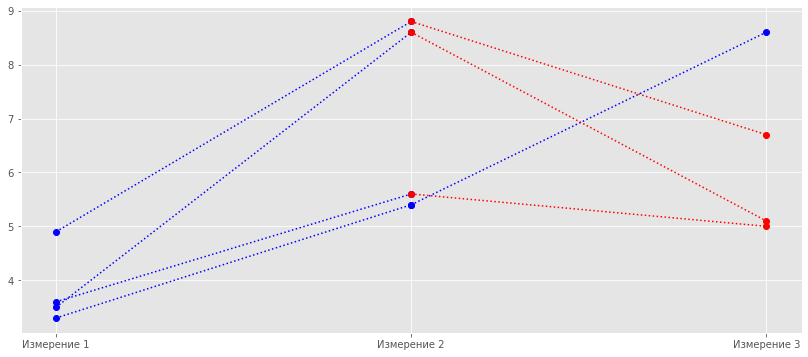

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

for i in range(1, 3):
    c1, c2 = f"Измерение {i}", f"Измерение {i+1}"
    ax.plot(df[[c1, c2]].query(f"`{c1}` <= `{c2}`").T, ":bo");
    ax.plot(df[[c1, c2]].query(f"`{c1}` > `{c2}`").T, ":ro");

In [21]:
chi2r, p = scipy.stats.friedmanchisquare(*df.values.T)

print(f"chi2r={chi2r:.3f}, p={p:.3f}")

chi2r=6.500, p=0.039


Различия статистически значимы. (при использовании параметрического критерия статистические различия не были выявлены)

**10.5.**

В гл. 3 на примере больных пиелонефритом была рассмотрена зависимость продолжительности госпитализации от правильности лечения. Д. Кнапп и соавт. решили выяснить, наблюдается ли такая зависимость при лечении пневмонии. Изучив 28 историй болезни, исследователи обнаружили следующее.

Продолжительность госпитализации, сут

При правильном лечении: 3.7, 2.5, 2.8, 3.0, 5.5, 6.4

При неправильном лечении: 3.8, 1.7, 4.8, 8.6, 6.8, 2.5, 5.3, 9.0, 7.9, 2.9, 5.5, 10.3, 8.8, 3.0, 5.8, 11.0, 9.0, 3.4, 7.1, 9.3, 3.7, 6.6

Есть ли разница в продолжительности госпитализации?

In [22]:
proper_group = [3.7, 2.5, 2.8, 3.0, 5.5, 6.4]
improper_group = [3.8, 1.7, 4.8, 8.6, 6.8, 2.5, 5.3, 9.0, 7.9, 2.9, 5.5, 10.3, 8.8, 3.0, 5.8, 11.0, 9.0, 3.4, 7.1, 9.3, 3.7, 6.6]

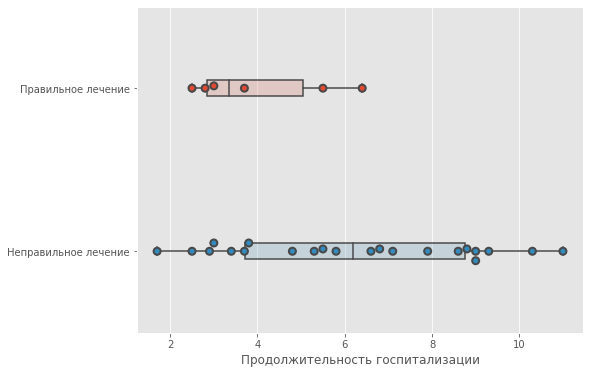

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.swarmplot(data=[proper_group, improper_group], orient="h", ax=ax, size=7, linewidth=2)
sns.boxplot(data=[proper_group, improper_group], orient="h", ax=ax, width=0.1)

# костыль, чтоб сделать прозрачным боксплот
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .2))

ax.set_yticklabels(["Правильное лечение", "Неправильное лечение"]);
ax.set_xlabel("Продолжительность госпитализации");

In [24]:
for group_name in ["proper_group", "improper_group"]:
    group = eval(group_name)
    mean, std = np.mean(group), np.std(group, ddof=1)
    p = scipy.stats.shapiro(group).pvalue
    print(f"{group_name}:\n\tmean={mean:.3f}, std={std:.3f}, shapiro_p_val={p:.3f}")

proper_group:
	mean=3.983, std=1.599, shapiro_p_val=0.210
improper_group:
	mean=6.218, std=2.762, shapiro_p_val=0.384


Как видно, хоть по отдельность выборки статистически не отличаются от нормальнораспределенных, однако имеют весьма отличные СО, что не позволяет применить параметрические тесты для их сравнения.

In [25]:
U, p = scipy.stats.mannwhitneyu(proper_group, improper_group, alternative='two-sided')

nm = min(len(proper_group), len(improper_group))
T = U + nm*(nm + 1)/2

print(f"T = {T}, U = {U}, nm = {nm}, p = {p}")

T = 54.0, U = 33.0, nm = 6, p = 0.06862252878090182


Различия статистически не значимы.

**10.6.**

Предсердный натрийуретический гормон усиливает выведение натрия и воды почками. В. Хименес и соавт. (W. Jimenez et al. Atrial natriuretic factor: reduced cardiac content in cirrhotic rats with ascites. Am. J. Physiol., 250:F749—F752, 1986) исследовали его роль в задержке натрия и воды при циррозе печени. Крысам вводили экстракт предсердия: одной группе — экстракт, полученный от здоровых крыс, другой — от крыс с циррозом печени. Регистрировали изменение выделения натрия с мочой (в процентах от исходного). Результаты представлены в таблице. Какой вывод можно сделать по результатам опыта?

Экстракт от здоровых крыс|Экстракт от крыс с циррозом
-|-
 760|80
1000|80
1370|80
1680|210
1970|210
2420|320
3260|500
5000|610
5400|760
7370|760
_|890
_|890
_|1870
_|1950

In [26]:
healthy_group = [760, 1000, 1370, 1680, 1970, 2420, 3260, 5000, 5400, 7370]
diseased_group = [80, 80, 80, 210, 210, 320, 500, 610, 760, 760, 890, 890, 1870, 1950]

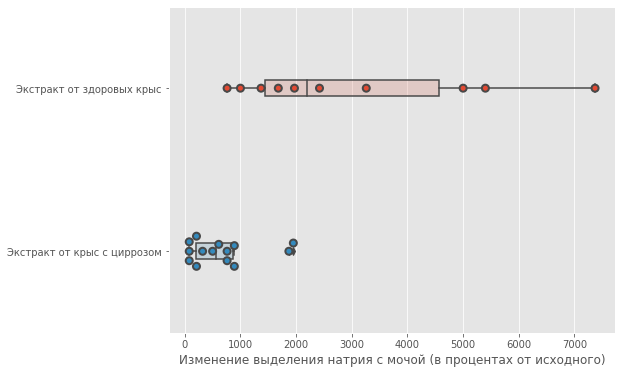

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.swarmplot(data=[healthy_group, diseased_group], orient="h", ax=ax, size=7, linewidth=2)
sns.boxplot(data=[healthy_group, diseased_group], orient="h", ax=ax, width=0.1)

# костыль, чтоб сделать прозрачным боксплот
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .2))

ax.set_yticklabels(["Экстракт от здоровых крыс", "Экстракт от крыс с циррозом"]);
ax.set_xlabel("Изменение выделения натрия с мочой (в процентах от исходного)");

После такой визуализации можно и не продолжать дальше, а сразу сказать, что различия явно в присутствуют.

In [28]:
for group_name in ["healthy_group", "diseased_group"]:
    group = eval(group_name)
    mean, std = np.mean(group), np.std(group, ddof=1)
    p = scipy.stats.shapiro(group).pvalue
    print(f"{group_name}:\n\tmean={mean:.3f}, std={std:.3f}, shapiro_p_val={p:.3f}")

healthy_group:
	mean=3023.000, std=2204.375, shapiro_p_val=0.159
diseased_group:
	mean=657.857, std=608.392, shapiro_p_val=0.013


Тут весь набор, чтоб использовать непараметрические методы.

In [29]:
U, p = scipy.stats.mannwhitneyu(healthy_group, diseased_group, alternative='two-sided',)

nm = min(len(healthy_group), len(diseased_group))
T = U + nm*(nm + 1)/2

print(f"T = {T}, U = {U}, nm = {nm}, p = {p}")

T = 184.0, U = 129.0, nm = 10, p = 0.0005972059826871676


Различия статистически значимы.

**10.7.**

Введя изотоп внутривенно и наблюдая за его распространением с помощью гамма-камеры, можно определить кровенаполнение различных органов, в том числе легких. Р. Окада и соавт. (R. Okada et al. Radionuclide-determined change in pulmonary blood volume with exercise: improved sensitivity ofmultigated bloodpool scanning in detecting coronary-artery disease. N. Engl. J. Med., 301:569—576, 1979) решили использовать этот метод для локализации поражения коронарных артерий при ишемической болезни сердца. Правая коронарная артерия снабжает кровью главным образом правый желудочек, левая — главным образом левый. Левый желудочек перекачивает кровь, которая поступает в него из легких, по всему телу. При поражении левой коронарной артерии кровоснабжение левого желудочка ухудшается. В покое, когда объем перекачиваемой крови невелик, это никак не проявляется, однако при физической нагрузке это приводит к накоплению крови в легких. При поражении правой коронарной артерии этого не происходит. Примерно так рассуждали авторы, приступая к работе. Было обследовано 33 человека: 9 здоровых (1-я группа) и 24 больных ишемической болезнью сердца, из них 5 с поражением только правой коронарной артерии (2-я группа) и 19 с поражением обеих коронарных артерий или только левой (3-я группа). Рассчитывали отношение кровенаполнения легких при физической нагрузке к кровенаполнению в покое: по мысли авторов, в 3-й группе этот показатель должен быть выше, чем в первых двух. Результаты представлены в таблице.

* группа 1 (Здоровые): 0.83, 0.89, 0.91, 0.93, 0.94, 0.97, 0.97, 0.98, 1.02
* группа 2 (Поражена только ПКА): 0.86, 0.92, 1.00, 1.02, 1.20
* группа 3 (Поражены обе КА): 0.98, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.22, 1.07, 1.23, 1.13, 1.08, 1.32, 1.10, 1.15, 1.37, 1.18, 1.12, 1.58

Различаются ли группы межцу собой? Если да, то как именно и достаточно ли велико различие, чтобы исследуемый показатель можно было использовать для определения пораженной коронарной артерии?

In [30]:
data = {"Здоровые": [0.83, 0.89, 0.91, 0.93, 0.94, 0.97, 0.97, 0.98, 1.02],
        "Поражена только ПКА": [0.86, 0.92, 1.00, 1.02, 1.20],
        "Поражены обе КА": [0.98, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.22, 1.07, 1.23, 1.13, 1.08, 1.32, 1.10, 1.15, 1.37, 1.18, 1.12, 1.58]}

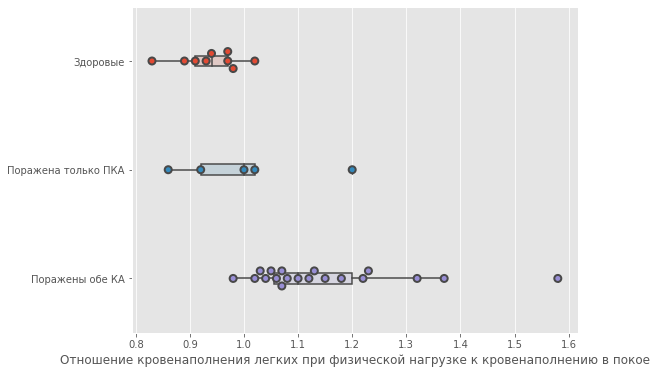

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.swarmplot(data=[data[g] for g in data], orient="h", ax=ax, size=7, linewidth=2)
sns.boxplot(data=[data[g] for g in data], orient="h", ax=ax, width=0.1)

# костыль, чтоб сделать прозрачным боксплот
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .2))

ax.set_yticklabels(data);
ax.set_xlabel("Отношение кровенаполнения легких при физической нагрузке к кровенаполнению в покое");

In [32]:
for group_name in data:
    group = data[group_name]
    mean, std = np.mean(group), np.std(group, ddof=1)
    p = scipy.stats.shapiro(group).pvalue
    print(f"{group_name}:\n\tmean={mean:.3f}, std={std:.3f}, shapiro_p_val={p:.3f}")

Здоровые:
	mean=0.938, std=0.056, shapiro_p_val=0.884
Поражена только ПКА:
	mean=1.000, std=0.129, shapiro_p_val=0.681
Поражены обе КА:
	mean=1.147, std=0.146, shapiro_p_val=0.005


Сильное отличие СО между "здоровыми" и остальными и "ненормальность" распределения для группы с поражением обеих коронарных артерий делают невозможным применения параметрических критериев.

In [33]:
H, p = scipy.stats.kruskal(*[data[g] for g in data])

print(f"H={H:.3f}, p={p:.3f}")

H=18.366, p=0.000


Различия групп статистически значимы.

In [34]:
pc = sp.posthoc_conover(pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data.items() ])).melt().query("not value.isnull()", engine='python'), val_col="value", group_col="variable")
pc

,Здоровые,Поражена только ПКА,Поражены обе КА
Здоровые,1.000000,0.158456,0.000001
Поражена только ПКА,0.158456,1.000000,0.002459
Поражены обе КА,0.000001,0.002459,1.000000


Попарное сравнение показывает отсутствие статистически значимых различий между группами "здоровые" и "поражена только ПКА", при этом отличие каждой из этих групп от группы "Поражены обе КА" статистически значимо.

В итоге группы не распадаются на различающиеся категории. Т.о. предполагавшееся диагностическое значение исследуемого показателя не доказано.

**10.8.**

Грезя о славе, автор этих строк предложил новый метод оценки эффективности лечения. Преимущество метода — его простота. Он состоит в следующем. Если у больного интересующий нас показатель увеличивается, ставится оценка +1, если уменьшается — 0 (допустим, случай неизменности показателя исключен). Сумма оценок по всем больным и есть значение критерия G. Вот пример расчета.

Больной|до лечения|после лечения|изменение показателя|Оценка
-|-|-|-|-
1|100|110|+10|+1
2|95|96|+1|+1
3|120|100|–20|0
4|111|123|+12|+1

Значение критерия G = 1 + 1 + 0 + 1 = 3. Является ли G полноценным критерием? Постройте распределение G и найдите критическое значение для случаев, когда число больных равно 4 и 6.

Да, критерий G ничем не хуже прочих (если не считать проблемы: что делать, если показатель не изменился).

Для n = 4 распределение его значений таково:

G|Вероятность
-|-
0|1/16
1|4/16
2|6/16
3|4/16
4|1/16

Для случая n = 6:

G|Вероятность
-|-
0|1/64
1|6/64
2|15/64
3|20/64
4|15/64
5|6/64
6|1/64

При n = 4 вероятность получить даже самые маловероятные значения — 0 или 64 составляет 1/16 + 1/16 = 1/8 = 0,125. В этом случае мы не можем указать критическое значение для 5% уровня значимости (при этой численности
группы критерий Уилкоксона тоже не даст результата). При n = 6 критические значения — 0 и 6, соответствующий уровень значимости 1/64 + 1/64 = 1/32 = 0,031.